In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score

In [363]:
torch.manual_seed(0)

In [364]:
pure_noisy_m2 = pd.read_csv("./data/pure_noisy_m2.csv")

In [365]:
pure_noisy_m2.columns

Index(['Timestamp', 'DateTime', 'SensorID', 'SequenceNumber', 'TotalLength',
       'SourceAddress', 'TempHumiRange', 'TempHumiStatus', 'TempHumiEvent',
       'TempHumiSenVal', 'XSenEvent', 'XOAVelocity', 'XPeakmg', 'XRMSmg',
       'XKurtosis', 'XCrestFactor', 'XSkewness', 'XDeviation',
       'XPeaktoPeakDisplacement', 'YSenEvent', 'YOAVelocity', 'YPeakmg',
       'YRMSmg', 'YKurtosis', 'YCrestFactor', 'YSkewness', 'YDeviation',
       'YPeaktoPeakDisplacement', 'ZSenEvent', 'ZOAVelocity', 'ZPeakmg',
       'ZRMSmg', 'ZKurtosis', 'ZCrestFactor', 'ZSkewness', 'ZDeviation',
       'ZPeaktoPeakDisplacement', 'LogIndex', 'DeviceEvents', 'DevicePowerSrc',
       'DeviceBatteryVolt', 'DeviceTime', 'is_pure'],
      dtype='object')

In [366]:
features = [
    "XOAVelocity", "XPeakmg", "XRMSmg", "XKurtosis", "XCrestFactor", "XSkewness", "XDeviation", "XPeaktoPeakDisplacement",
    "YOAVelocity", "YPeakmg", "YRMSmg", "YKurtosis", "YCrestFactor", "YSkewness", "YDeviation", "YPeaktoPeakDisplacement",
    "ZOAVelocity", "ZPeakmg", "ZRMSmg", "ZKurtosis", "ZCrestFactor", "ZSkewness", "ZDeviation", "ZPeaktoPeakDisplacement",
]

y = "is_pure"

In [367]:
pure_noisy_m2 = pure_noisy_m2[features + [y]]
pure_noisy_m2

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,...,YPeaktoPeakDisplacement,ZOAVelocity,ZPeakmg,ZRMSmg,ZKurtosis,ZCrestFactor,ZSkewness,ZDeviation,ZPeaktoPeakDisplacement,is_pure
0,8.0,14.0,10.0,-12.0,2400.0,0.0,7.0,1.0,8.0,11.0,...,0.0,17.0,83.0,59.0,0.0,0.0,0.0,0.0,0.0,1
1,88.0,231.0,164.0,33.0,17.0,-1.0,518.0,9.0,55.0,165.0,...,0.0,139.0,725.0,513.0,0.0,0.0,0.0,0.0,0.0,1
2,28.0,62.0,44.0,53.0,117.0,-13.0,136.0,3.0,34.0,57.0,...,0.0,87.0,458.0,324.0,0.0,0.0,0.0,0.0,0.0,1
3,221.0,147.0,104.0,82.0,119.0,-11.0,334.0,23.0,261.0,179.0,...,0.0,64.0,91.0,65.0,0.0,0.0,0.0,0.0,0.0,1
4,5.0,5.0,4.0,-6.0,140.0,8.0,0.0,1.0,7.0,5.0,...,0.0,6.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,18.0,36.0,26.0,98.0,596.0,-1.0,236.0,2.0,18.0,48.0,...,0.0,68.0,182.0,129.0,0.0,0.0,0.0,0.0,0.0,0
11533,97.0,141.0,100.0,320.0,292.0,9.0,18.0,3.0,59.0,86.0,...,0.0,109.0,353.0,250.0,0.0,0.0,0.0,0.0,0.0,0
11534,28.0,155.0,110.0,29.0,1064.0,-2.0,404.0,2.0,63.0,253.0,...,0.0,67.0,370.0,262.0,0.0,0.0,0.0,0.0,0.0,1
11535,20.0,39.0,28.0,118.0,425.0,-3.0,233.0,1.0,19.0,50.0,...,0.0,68.0,182.0,129.0,0.0,0.0,0.0,0.0,0.0,0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_pure', ylabel='count'>

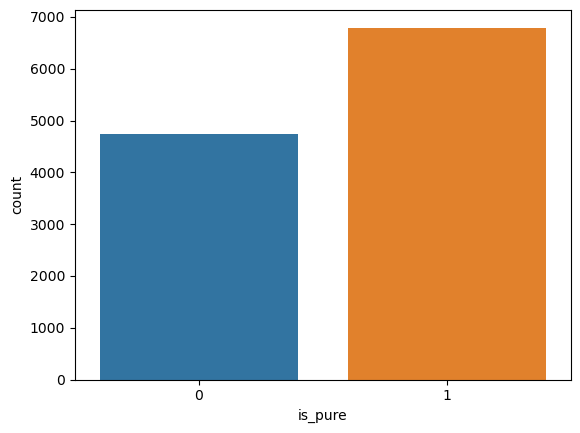

In [368]:
sns.countplot(pure_noisy_m2[y])

In [369]:
scaler = MinMaxScaler()
scaled_pure_noisy_m2 = pd.DataFrame(scaler.fit_transform(pure_noisy_m2.values), columns=pure_noisy_m2.columns)
scaled_pure_noisy_m2

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,...,YPeaktoPeakDisplacement,ZOAVelocity,ZPeakmg,ZRMSmg,ZKurtosis,ZCrestFactor,ZSkewness,ZDeviation,ZPeaktoPeakDisplacement,is_pure
0,0.007326,0.020737,0.019544,0.025143,0.311203,0.269565,0.003889,0.009804,0.006349,0.009511,...,0.0,0.018421,0.026185,0.026242,0.0,0.0,0.0,0.0,0.0,1.0
1,0.153846,0.520737,0.521173,0.035068,0.002204,0.265217,0.287778,0.088235,0.080952,0.218750,...,0.0,0.178947,0.238979,0.238988,0.0,0.0,0.0,0.0,0.0,1.0
2,0.043956,0.131336,0.130293,0.039479,0.015171,0.213043,0.075556,0.029412,0.047619,0.072011,...,0.0,0.110526,0.150481,0.150422,0.0,0.0,0.0,0.0,0.0,1.0
3,0.397436,0.327189,0.325733,0.045876,0.015430,0.221739,0.185556,0.225490,0.407937,0.237772,...,0.0,0.080263,0.028837,0.029053,0.0,0.0,0.0,0.0,0.0,1.0
4,0.001832,0.000000,0.000000,0.026467,0.018154,0.304348,0.000000,0.009804,0.004762,0.001359,...,0.0,0.003947,0.000331,0.000469,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,0.025641,0.071429,0.071661,0.049404,0.077282,0.265217,0.131111,0.019608,0.022222,0.059783,...,0.0,0.085526,0.058999,0.059044,0.0,0.0,0.0,0.0,0.0,0.0
11533,0.170330,0.313364,0.312704,0.098368,0.037863,0.308696,0.010000,0.029412,0.087302,0.111413,...,0.0,0.139474,0.115678,0.115745,0.0,0.0,0.0,0.0,0.0,0.0
11534,0.043956,0.345622,0.345277,0.034186,0.137967,0.260870,0.224444,0.019608,0.093651,0.338315,...,0.0,0.084211,0.121313,0.121368,0.0,0.0,0.0,0.0,0.0,1.0
11535,0.029304,0.078341,0.078176,0.053816,0.055109,0.256522,0.129444,0.009804,0.023810,0.062500,...,0.0,0.085526,0.058999,0.059044,0.0,0.0,0.0,0.0,0.0,0.0


### discriminator data

In [370]:
X = scaled_pure_noisy_m2.drop(columns=["is_pure"])
y = scaled_pure_noisy_m2[["is_pure"]]

In [371]:
X = X.values.reshape(X.shape[0], 3, -1)
X.shape

(11537, 3, 8)

In [372]:
y = y.values.reshape((len(y), -1))
y.shape

(11537, 1)

In [373]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=42)

In [374]:
train_X.shape

(9229, 3, 8)

In [375]:
test_X.shape

(2308, 3, 8)

In [376]:
np.unique(train_y, return_counts=True)

(array([0., 1.]), array([3811, 5418]))

In [377]:
np.unique(test_y, return_counts=True)

(array([0., 1.]), array([ 931, 1377]))

In [378]:
num_epochs = 500
lr=0.001

In [379]:
train_X_tensor = torch.tensor(train_X, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32)

In [380]:
test_X_tensor = torch.tensor(test_X, dtype=torch.float32)
test_y_tensor = torch.tensor(test_y, dtype=torch.float32)

### discriminator

In [381]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.discriminator = nn.Sequential(
            nn.Conv1d(3, 24, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv1d(24, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=4, stride=2),
            nn.Flatten(),
            nn.Linear(8 * 3, 8),
            nn.ReLU(),
            nn.Linear(8, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.discriminator(x)

In [382]:
discriminator = Discriminator()
discriminator_cost = nn.BCELoss()
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr)

### discriminator training

In [383]:
discriminator.train()

Discriminator(
  (discriminator): Sequential(
    (0): Conv1d(3, 24, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(24, 8, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): MaxPool1d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=24, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=3, bias=True)
    (9): ReLU()
    (10): Linear(in_features=3, out_features=1, bias=True)
    (11): Sigmoid()
  )
)

In [384]:
epochs = list(range(1, num_epochs + 1))

train_loss = []
test_loss = []

train_f1 = []
test_f1 = []

train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    train_y_hat = discriminator(train_X_tensor)

    train_j = discriminator_cost(train_y_hat, train_y_tensor)

    discriminator_optimizer.zero_grad()

    train_j.backward()

    discriminator_optimizer.step()

    with torch.no_grad():
        test_y_hat = discriminator(test_X_tensor)
        test_j = discriminator_cost(test_y_hat, test_y_tensor)

        train_y_hat_class = train_y_hat.round()
        train_f1_score = f1_score(train_y_tensor, train_y_hat_class)
        train_accuracy_score = accuracy_score(train_y_tensor, train_y_hat_class)

        train_loss.append(train_j.item())
        train_f1.append(train_f1_score.item())
        train_accuracy.append(train_accuracy_score.item())

        test_y_hat_class = test_y_hat.round()
        test_f1_score = f1_score(test_y_tensor, test_y_hat_class)
        test_accuracy_score = accuracy_score(test_y_tensor, test_y_hat_class)

        test_loss.append(test_j.item())
        test_f1.append(test_f1_score.item())
        test_accuracy.append(test_accuracy_score.item())

    print(f"epoch {epoch+1}/{num_epochs} | training loss {train_j.item():.3f} | test loss {test_j.item():.3f}")



epoch 1/500 | training loss 0.756 | test loss 0.759
epoch 2/500 | training loss 0.755 | test loss 0.758
epoch 3/500 | training loss 0.754 | test loss 0.758
epoch 4/500 | training loss 0.754 | test loss 0.757
epoch 5/500 | training loss 0.753 | test loss 0.756
epoch 6/500 | training loss 0.752 | test loss 0.755
epoch 7/500 | training loss 0.751 | test loss 0.755
epoch 8/500 | training loss 0.751 | test loss 0.754
epoch 9/500 | training loss 0.750 | test loss 0.753
epoch 10/500 | training loss 0.749 | test loss 0.752
epoch 11/500 | training loss 0.749 | test loss 0.752
epoch 12/500 | training loss 0.748 | test loss 0.751
epoch 13/500 | training loss 0.747 | test loss 0.750
epoch 14/500 | training loss 0.746 | test loss 0.749
epoch 15/500 | training loss 0.746 | test loss 0.748
epoch 16/500 | training loss 0.745 | test loss 0.748
epoch 17/500 | training loss 0.744 | test loss 0.747
epoch 18/500 | training loss 0.743 | test loss 0.746
epoch 19/500 | training loss 0.742 | test loss 0.745
ep

epoch 155/500 | training loss 0.678 | test loss 0.674
epoch 156/500 | training loss 0.678 | test loss 0.674
epoch 157/500 | training loss 0.678 | test loss 0.674
epoch 158/500 | training loss 0.678 | test loss 0.674
epoch 159/500 | training loss 0.678 | test loss 0.674
epoch 160/500 | training loss 0.678 | test loss 0.674
epoch 161/500 | training loss 0.678 | test loss 0.674
epoch 162/500 | training loss 0.678 | test loss 0.674
epoch 163/500 | training loss 0.678 | test loss 0.674
epoch 164/500 | training loss 0.678 | test loss 0.674
epoch 165/500 | training loss 0.677 | test loss 0.674
epoch 166/500 | training loss 0.677 | test loss 0.674
epoch 167/500 | training loss 0.677 | test loss 0.674
epoch 168/500 | training loss 0.677 | test loss 0.674
epoch 169/500 | training loss 0.677 | test loss 0.674
epoch 170/500 | training loss 0.677 | test loss 0.674
epoch 171/500 | training loss 0.677 | test loss 0.674
epoch 172/500 | training loss 0.677 | test loss 0.674
epoch 173/500 | training los

epoch 310/500 | training loss 0.676 | test loss 0.673
epoch 311/500 | training loss 0.676 | test loss 0.673
epoch 312/500 | training loss 0.676 | test loss 0.673
epoch 313/500 | training loss 0.676 | test loss 0.673
epoch 314/500 | training loss 0.676 | test loss 0.673
epoch 315/500 | training loss 0.676 | test loss 0.673
epoch 316/500 | training loss 0.676 | test loss 0.673
epoch 317/500 | training loss 0.676 | test loss 0.672
epoch 318/500 | training loss 0.676 | test loss 0.672
epoch 319/500 | training loss 0.676 | test loss 0.672
epoch 320/500 | training loss 0.676 | test loss 0.672
epoch 321/500 | training loss 0.676 | test loss 0.672
epoch 322/500 | training loss 0.676 | test loss 0.672
epoch 323/500 | training loss 0.676 | test loss 0.672
epoch 324/500 | training loss 0.676 | test loss 0.672
epoch 325/500 | training loss 0.676 | test loss 0.672
epoch 326/500 | training loss 0.676 | test loss 0.672
epoch 327/500 | training loss 0.676 | test loss 0.672
epoch 328/500 | training los

epoch 465/500 | training loss 0.665 | test loss 0.665
epoch 466/500 | training loss 0.665 | test loss 0.665
epoch 467/500 | training loss 0.665 | test loss 0.665
epoch 468/500 | training loss 0.665 | test loss 0.665
epoch 469/500 | training loss 0.665 | test loss 0.665
epoch 470/500 | training loss 0.665 | test loss 0.665
epoch 471/500 | training loss 0.665 | test loss 0.665
epoch 472/500 | training loss 0.665 | test loss 0.665
epoch 473/500 | training loss 0.665 | test loss 0.665
epoch 474/500 | training loss 0.665 | test loss 0.665
epoch 475/500 | training loss 0.665 | test loss 0.665
epoch 476/500 | training loss 0.665 | test loss 0.665
epoch 477/500 | training loss 0.664 | test loss 0.665
epoch 478/500 | training loss 0.664 | test loss 0.665
epoch 479/500 | training loss 0.664 | test loss 0.665
epoch 480/500 | training loss 0.664 | test loss 0.665
epoch 481/500 | training loss 0.664 | test loss 0.665
epoch 482/500 | training loss 0.664 | test loss 0.665
epoch 483/500 | training los

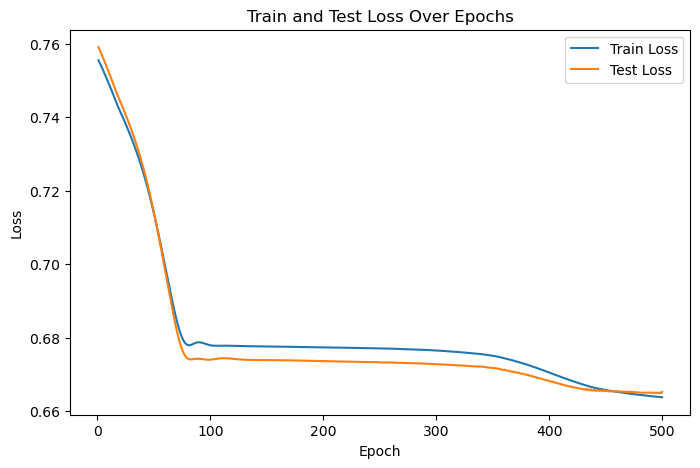

In [385]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Train Loss', linestyle='-')
plt.plot(epochs, test_loss, label='Test Loss', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()
plt.grid(False)
plt.show()

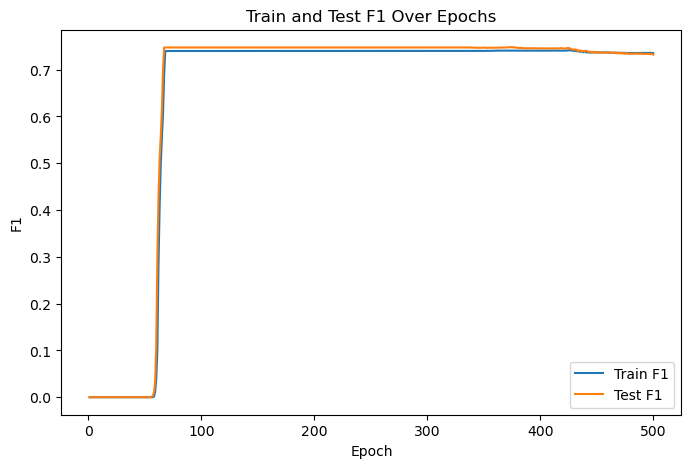

In [386]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_f1, label='Train F1', linestyle='-')
plt.plot(epochs, test_f1, label='Test F1', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.title('Train and Test F1 Over Epochs')
plt.legend()
plt.grid(False)
plt.show()

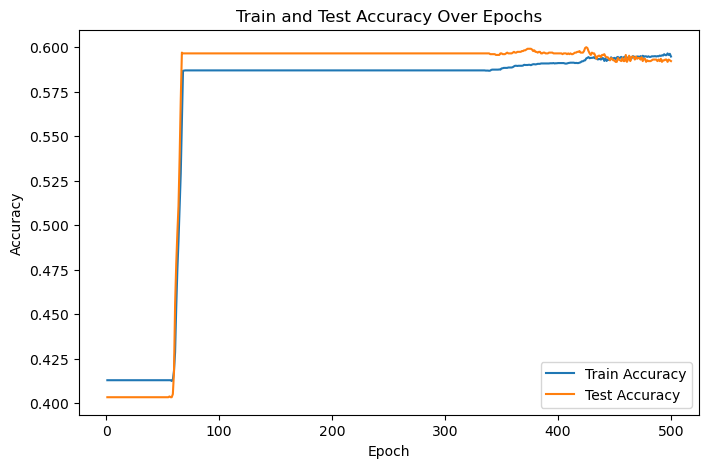

In [387]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, label='Train Accuracy', linestyle='-')
plt.plot(epochs, test_accuracy, label='Test Accuracy', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Over Epochs')
plt.legend()
plt.grid(False)
plt.show()

### discriminator testing

In [388]:
discriminator.eval()

Discriminator(
  (discriminator): Sequential(
    (0): Conv1d(3, 24, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(24, 8, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): MaxPool1d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=24, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=3, bias=True)
    (9): ReLU()
    (10): Linear(in_features=3, out_features=1, bias=True)
    (11): Sigmoid()
  )
)

In [389]:
with torch.no_grad():
    test_y_hat = discriminator(test_X_tensor)
    test_y_hat_class = test_y_hat.round()

    print(f"accuracy_score: {accuracy_score(test_y_tensor, test_y_hat_class)}")
    print(f"f1: {f1_score(test_y_tensor, test_y_hat_class)}")

accuracy_score: 0.5922876949740035
f1: 0.731832430891992


### generator data

In [390]:
original_pure_m2 = scaled_pure_noisy_m2.loc[pure_noisy_m2["is_pure"] == 1]
original_pure_m2 = original_pure_m2.drop(columns=["is_pure"])
original_pure_m2

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,...,YDeviation,YPeaktoPeakDisplacement,ZOAVelocity,ZPeakmg,ZRMSmg,ZKurtosis,ZCrestFactor,ZSkewness,ZDeviation,ZPeaktoPeakDisplacement
0,0.007326,0.020737,0.019544,0.025143,0.311203,0.269565,0.003889,0.009804,0.006349,0.009511,...,0.0,0.0,0.018421,0.026185,0.026242,0.0,0.0,0.0,0.0,0.0
1,0.153846,0.520737,0.521173,0.035068,0.002204,0.265217,0.287778,0.088235,0.080952,0.218750,...,0.0,0.0,0.178947,0.238979,0.238988,0.0,0.0,0.0,0.0,0.0
2,0.043956,0.131336,0.130293,0.039479,0.015171,0.213043,0.075556,0.029412,0.047619,0.072011,...,0.0,0.0,0.110526,0.150481,0.150422,0.0,0.0,0.0,0.0,0.0
3,0.397436,0.327189,0.325733,0.045876,0.015430,0.221739,0.185556,0.225490,0.407937,0.237772,...,0.0,0.0,0.080263,0.028837,0.029053,0.0,0.0,0.0,0.0,0.0
4,0.001832,0.000000,0.000000,0.026467,0.018154,0.304348,0.000000,0.009804,0.004762,0.001359,...,0.0,0.0,0.003947,0.000331,0.000469,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11512,0.005495,0.004608,0.003257,0.029554,0.030213,0.260870,0.000556,0.009804,0.007937,0.001359,...,0.0,0.0,0.019737,0.007955,0.007966,0.0,0.0,0.0,0.0,0.0
11519,0.029304,0.182028,0.182410,0.041906,0.185814,0.230435,0.120556,0.019608,0.085714,0.252717,...,0.0,0.0,0.082895,0.071263,0.071228,0.0,0.0,0.0,0.0,0.0
11520,0.020147,0.048387,0.048860,0.071681,0.007002,0.295652,0.082778,0.009804,0.020635,0.039402,...,0.0,0.0,0.069737,0.039443,0.039363,0.0,0.0,0.0,0.0,0.0
11521,0.104396,0.193548,0.192182,0.027128,0.018672,0.273913,0.004444,0.019608,0.084127,0.105978,...,0.0,0.0,0.089474,0.061651,0.061856,0.0,0.0,0.0,0.0,0.0


In [391]:
noisy_m2 = scaled_pure_noisy_m2.loc[pure_noisy_m2["is_pure"] == 0]
noisy_m2 = noisy_m2.drop(columns=["is_pure"])
noisy_m2

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,...,YDeviation,YPeaktoPeakDisplacement,ZOAVelocity,ZPeakmg,ZRMSmg,ZKurtosis,ZCrestFactor,ZSkewness,ZDeviation,ZPeaktoPeakDisplacement
159,0.021978,0.078341,0.078176,0.027128,0.084155,0.269565,0.006111,0.019608,0.023810,0.038043,...,0.0,0.0,0.077632,0.123633,0.123711,0.0,0.0,0.0,0.0,0.0
160,0.148352,0.576037,0.576547,0.040141,0.012059,0.286957,0.328889,0.058824,0.074603,0.220109,...,0.0,0.0,0.186842,0.237653,0.237582,0.0,0.0,0.0,0.0,0.0
161,0.038462,0.165899,0.166124,0.030216,0.032676,0.278261,0.107222,0.019608,0.033333,0.065217,...,0.0,0.0,0.107895,0.131256,0.131209,0.0,0.0,0.0,0.0,0.0
162,0.357143,0.343318,0.342020,0.043670,0.234180,0.252174,0.265556,0.225490,0.350794,0.236413,...,0.0,0.0,0.132895,0.029831,0.029991,0.0,0.0,0.0,0.0,0.0
164,0.133700,0.615207,0.615635,0.032201,0.038122,0.308696,0.331111,0.039216,0.074603,0.260870,...,0.0,0.0,0.185526,0.260855,0.261012,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,0.043956,0.343318,0.342020,0.037936,0.219139,0.269565,0.224444,0.019608,0.082540,0.316576,...,0.0,0.0,0.072368,0.107723,0.107779,0.0,0.0,0.0,0.0,0.0
11532,0.025641,0.071429,0.071661,0.049404,0.077282,0.265217,0.131111,0.019608,0.022222,0.059783,...,0.0,0.0,0.085526,0.058999,0.059044,0.0,0.0,0.0,0.0,0.0
11533,0.170330,0.313364,0.312704,0.098368,0.037863,0.308696,0.010000,0.029412,0.087302,0.111413,...,0.0,0.0,0.139474,0.115678,0.115745,0.0,0.0,0.0,0.0,0.0
11535,0.029304,0.078341,0.078176,0.053816,0.055109,0.256522,0.129444,0.009804,0.023810,0.062500,...,0.0,0.0,0.085526,0.058999,0.059044,0.0,0.0,0.0,0.0,0.0


In [392]:
X = noisy_m2
X = X.values.reshape(X.shape[0], 3, -1)
X.shape

(4742, 3, 8)

In [393]:
train_X, test_X = train_test_split(X, train_size=0.8, random_state=42)

In [394]:
train_X.shape

(3793, 3, 8)

In [395]:
test_X.shape

(949, 3, 8)

In [396]:
train_X_tensor = torch.tensor(train_X, dtype=torch.float32)

In [397]:
test_X_tensor = torch.tensor(test_X, dtype=torch.float32)

In [398]:
num_epochs = 500
lr=0.001
alpha, beta = 1, 2

### generator

In [399]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(3, 24, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv1d(24, 16, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv1d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(8 * 8, 3),
            nn.LeakyReLU(0.2),
        )

        self.decoder = nn.Sequential(
            nn.Linear(3, 8),
            nn.LeakyReLU(0.2),
            nn.Linear(8, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 24),
            nn.ReLU(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.reshape(decoded.shape[0], 3, 8)

In [400]:
generator = Generator()
generator_cost = nn.MSELoss()
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)

### generator training

In [401]:
generator.train()

Generator(
  (encoder): Sequential(
    (0): Conv1d(3, 24, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv1d(24, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): LeakyReLU(negative_slope=0.2)
    (4): Conv1d(16, 8, kernel_size=(3,), stride=(1,), padding=(1,))
    (5): LeakyReLU(negative_slope=0.2)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=64, out_features=3, bias=True)
    (8): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=8, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=16, out_features=24, bias=True)
    (5): ReLU()
  )
)

In [402]:
epochs = list(range(1, num_epochs + 1))

train_loss = []
test_loss = []

for epoch in range(num_epochs):
    train_X_hat = generator(train_X_tensor)

    with torch.no_grad():
        train_is_pure = discriminator(train_X_hat)

    train_is_pure.requires_grad_()

    train_j = (alpha * (-torch.log(train_is_pure).mean())) + (beta * generator_cost(train_X_hat, train_X_tensor))

    discriminator_optimizer.zero_grad()

    train_j.backward()

    discriminator_optimizer.step()

    with torch.no_grad():
        test_X_hat = generator(test_X_tensor)
        test_is_pure = discriminator(test_X_hat)
        test_j = (alpha * (-torch.log(test_is_pure).mean())) + (beta * generator_cost(test_X_hat, test_X_tensor))

        train_loss.append(train_j.item())
        test_loss.append(test_j.item())

    print(f"epoch {epoch+1}/{num_epochs} | training loss {train_j.item():.3f} | test loss {test_j.item():.3f}")

epoch 1/500 | training loss 0.373 | test loss 0.379
epoch 2/500 | training loss 0.379 | test loss 0.385
epoch 3/500 | training loss 0.385 | test loss 0.390
epoch 4/500 | training loss 0.390 | test loss 0.395
epoch 5/500 | training loss 0.395 | test loss 0.399
epoch 6/500 | training loss 0.400 | test loss 0.403
epoch 7/500 | training loss 0.404 | test loss 0.407
epoch 8/500 | training loss 0.408 | test loss 0.410
epoch 9/500 | training loss 0.411 | test loss 0.413
epoch 10/500 | training loss 0.414 | test loss 0.416
epoch 11/500 | training loss 0.417 | test loss 0.419
epoch 12/500 | training loss 0.419 | test loss 0.421
epoch 13/500 | training loss 0.422 | test loss 0.423
epoch 14/500 | training loss 0.424 | test loss 0.425
epoch 15/500 | training loss 0.426 | test loss 0.427
epoch 16/500 | training loss 0.427 | test loss 0.428
epoch 17/500 | training loss 0.429 | test loss 0.430
epoch 18/500 | training loss 0.430 | test loss 0.431
epoch 19/500 | training loss 0.432 | test loss 0.432
ep

epoch 156/500 | training loss 0.444 | test loss 0.443
epoch 157/500 | training loss 0.444 | test loss 0.443
epoch 158/500 | training loss 0.444 | test loss 0.443
epoch 159/500 | training loss 0.444 | test loss 0.443
epoch 160/500 | training loss 0.444 | test loss 0.443
epoch 161/500 | training loss 0.444 | test loss 0.443
epoch 162/500 | training loss 0.444 | test loss 0.443
epoch 163/500 | training loss 0.444 | test loss 0.443
epoch 164/500 | training loss 0.444 | test loss 0.443
epoch 165/500 | training loss 0.444 | test loss 0.443
epoch 166/500 | training loss 0.444 | test loss 0.443
epoch 167/500 | training loss 0.444 | test loss 0.443
epoch 168/500 | training loss 0.444 | test loss 0.443
epoch 169/500 | training loss 0.444 | test loss 0.443
epoch 170/500 | training loss 0.444 | test loss 0.443
epoch 171/500 | training loss 0.444 | test loss 0.443
epoch 172/500 | training loss 0.444 | test loss 0.443
epoch 173/500 | training loss 0.444 | test loss 0.443
epoch 174/500 | training los

epoch 312/500 | training loss 0.444 | test loss 0.443
epoch 313/500 | training loss 0.444 | test loss 0.443
epoch 314/500 | training loss 0.444 | test loss 0.443
epoch 315/500 | training loss 0.444 | test loss 0.443
epoch 316/500 | training loss 0.444 | test loss 0.443
epoch 317/500 | training loss 0.444 | test loss 0.443
epoch 318/500 | training loss 0.444 | test loss 0.443
epoch 319/500 | training loss 0.444 | test loss 0.443
epoch 320/500 | training loss 0.444 | test loss 0.443
epoch 321/500 | training loss 0.444 | test loss 0.443
epoch 322/500 | training loss 0.444 | test loss 0.443
epoch 323/500 | training loss 0.444 | test loss 0.443
epoch 324/500 | training loss 0.444 | test loss 0.443
epoch 325/500 | training loss 0.444 | test loss 0.443
epoch 326/500 | training loss 0.444 | test loss 0.443
epoch 327/500 | training loss 0.444 | test loss 0.443
epoch 328/500 | training loss 0.444 | test loss 0.443
epoch 329/500 | training loss 0.444 | test loss 0.443
epoch 330/500 | training los

epoch 464/500 | training loss 0.444 | test loss 0.443
epoch 465/500 | training loss 0.444 | test loss 0.443
epoch 466/500 | training loss 0.444 | test loss 0.443
epoch 467/500 | training loss 0.444 | test loss 0.443
epoch 468/500 | training loss 0.444 | test loss 0.443
epoch 469/500 | training loss 0.444 | test loss 0.443
epoch 470/500 | training loss 0.444 | test loss 0.443
epoch 471/500 | training loss 0.444 | test loss 0.443
epoch 472/500 | training loss 0.444 | test loss 0.443
epoch 473/500 | training loss 0.444 | test loss 0.443
epoch 474/500 | training loss 0.444 | test loss 0.443
epoch 475/500 | training loss 0.444 | test loss 0.443
epoch 476/500 | training loss 0.444 | test loss 0.443
epoch 477/500 | training loss 0.444 | test loss 0.443
epoch 478/500 | training loss 0.444 | test loss 0.443
epoch 479/500 | training loss 0.444 | test loss 0.443
epoch 480/500 | training loss 0.444 | test loss 0.443
epoch 481/500 | training loss 0.444 | test loss 0.443
epoch 482/500 | training los

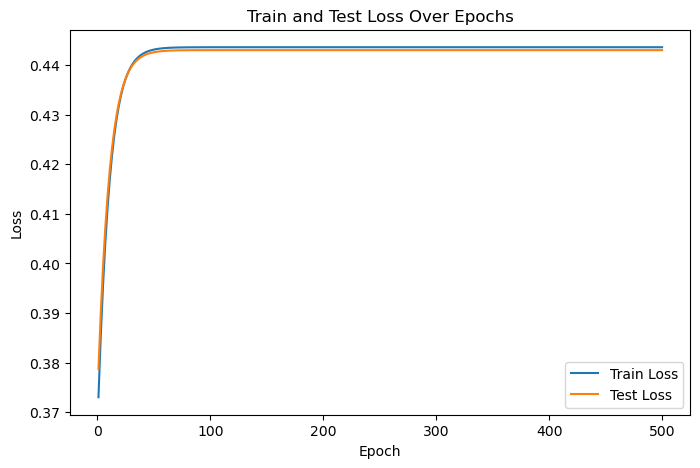

In [403]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Train Loss', linestyle='-')
plt.plot(epochs, test_loss, label='Test Loss', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()
plt.grid(False)
plt.show()

### generator testing

In [404]:
generator.eval()

Generator(
  (encoder): Sequential(
    (0): Conv1d(3, 24, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv1d(24, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): LeakyReLU(negative_slope=0.2)
    (4): Conv1d(16, 8, kernel_size=(3,), stride=(1,), padding=(1,))
    (5): LeakyReLU(negative_slope=0.2)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=64, out_features=3, bias=True)
    (8): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=8, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=16, out_features=24, bias=True)
    (5): ReLU()
  )
)

In [405]:
with torch.no_grad():
    test_X_hat = generator(test_X_tensor)
    test_is_pure = discriminator(test_X_hat)
    test_is_pure_class = test_is_pure.round()

    print(f"mse as reconstruction_error: {generator_cost(test_X_hat, test_X_tensor)}")
    print(f"accuracy_score: {accuracy_score(torch.ones(test_is_pure_class.shape), test_is_pure_class)}")

mse as reconstruction_error: 0.025067519396543503
accuracy_score: 1.0


In [406]:
X_tensor = torch.tensor(X, dtype=torch.float32)
X_tensor.shape

torch.Size([4742, 3, 8])

In [407]:
with torch.no_grad():
    generated_X_tensor = generator(X_tensor)
    generated_X = generated_X_tensor.reshape(generated_X_tensor.shape[0], -1).numpy()

generated_X.shape

(4742, 24)

In [408]:
generated_pure_m2 = pd.DataFrame(generated_X, columns=noisy_m2.columns)

In [409]:
generated_pure_m2

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,...,YDeviation,YPeaktoPeakDisplacement,ZOAVelocity,ZPeakmg,ZRMSmg,ZKurtosis,ZCrestFactor,ZSkewness,ZDeviation,ZPeaktoPeakDisplacement
0,0.070246,0.0,0.0,0.0,0.0,0.0,0.0,0.150321,0.178995,0.350462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154515,0.098305
1,0.070186,0.0,0.0,0.0,0.0,0.0,0.0,0.150356,0.178985,0.350393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154497,0.098020
2,0.070238,0.0,0.0,0.0,0.0,0.0,0.0,0.150323,0.178991,0.350456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154502,0.098246
3,0.070163,0.0,0.0,0.0,0.0,0.0,0.0,0.150376,0.178990,0.350355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154524,0.097974
4,0.070174,0.0,0.0,0.0,0.0,0.0,0.0,0.150362,0.178983,0.350379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154494,0.097968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,0.070204,0.0,0.0,0.0,0.0,0.0,0.0,0.150307,0.178999,0.350421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154462,0.097975
4738,0.070254,0.0,0.0,0.0,0.0,0.0,0.0,0.150302,0.179000,0.350474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154502,0.098292
4739,0.070224,0.0,0.0,0.0,0.0,0.0,0.0,0.150327,0.178994,0.350438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154504,0.098183
4740,0.070259,0.0,0.0,0.0,0.0,0.0,0.0,0.150295,0.179002,0.350482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154499,0.098305


In [410]:
generated_pure_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   XOAVelocity              4742 non-null   float32
 1   XPeakmg                  4742 non-null   float32
 2   XRMSmg                   4742 non-null   float32
 3   XKurtosis                4742 non-null   float32
 4   XCrestFactor             4742 non-null   float32
 5   XSkewness                4742 non-null   float32
 6   XDeviation               4742 non-null   float32
 7   XPeaktoPeakDisplacement  4742 non-null   float32
 8   YOAVelocity              4742 non-null   float32
 9   YPeakmg                  4742 non-null   float32
 10  YRMSmg                   4742 non-null   float32
 11  YKurtosis                4742 non-null   float32
 12  YCrestFactor             4742 non-null   float32
 13  YSkewness                4742 non-null   float32
 14  YDeviation              

In [411]:
extracted_pure_m2 = pd.concat([original_pure_m2, generated_pure_m2]).sample(frac=1.0, random_state=42).reset_index(drop=True)

In [412]:
extracted_pure_m2

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,...,YDeviation,YPeaktoPeakDisplacement,ZOAVelocity,ZPeakmg,ZRMSmg,ZKurtosis,ZCrestFactor,ZSkewness,ZDeviation,ZPeaktoPeakDisplacement
0,0.065934,0.133641,0.133550,0.085135,0.092453,0.269565,0.017778,0.029412,0.052381,0.082880,...,0.0,0.0,0.184211,0.222406,0.222587,0.0,0.0,0.0,0.000000,0.000000
1,0.025641,0.101382,0.100977,0.032422,0.335581,0.282609,0.166667,0.019608,0.028571,0.089674,...,0.0,0.0,0.094737,0.073914,0.074039,0.0,0.0,0.0,0.000000,0.000000
2,0.032967,0.092166,0.091205,0.031539,0.036177,0.282609,0.006111,0.009804,0.034921,0.052989,...,0.0,0.0,0.127632,0.160093,0.160262,0.0,0.0,0.0,0.000000,0.000000
3,0.070248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150301,0.179004,0.350465,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.154504,0.098259
4,0.018315,0.064516,0.065147,0.030878,0.446188,0.260870,0.136111,0.009804,0.020635,0.055707,...,0.0,0.0,0.061842,0.048061,0.048266,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,0.070164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150393,0.178973,0.350364,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.154515,0.098001
11533,0.045788,0.110599,0.110749,0.068593,0.406639,0.265217,0.013889,0.019608,0.049206,0.076087,...,0.0,0.0,0.132895,0.156115,0.156045,0.0,0.0,0.0,0.000000,0.000000
11534,0.047619,0.101382,0.100977,0.036171,0.003501,0.286957,0.006111,0.009804,0.034921,0.047554,...,0.0,0.0,0.107895,0.129599,0.129803,0.0,0.0,0.0,0.000000,0.000000
11535,0.124542,0.470046,0.469055,0.227834,0.435166,0.547826,0.260000,0.049020,0.160317,0.373641,...,0.0,0.0,0.359211,0.683792,0.683693,0.0,0.0,0.0,0.000000,0.000000


In [413]:
extracted_pure_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   XOAVelocity              11537 non-null  float64
 1   XPeakmg                  11537 non-null  float64
 2   XRMSmg                   11537 non-null  float64
 3   XKurtosis                11537 non-null  float64
 4   XCrestFactor             11537 non-null  float64
 5   XSkewness                11537 non-null  float64
 6   XDeviation               11537 non-null  float64
 7   XPeaktoPeakDisplacement  11537 non-null  float64
 8   YOAVelocity              11537 non-null  float64
 9   YPeakmg                  11537 non-null  float64
 10  YRMSmg                   11537 non-null  float64
 11  YKurtosis                11537 non-null  float64
 12  YCrestFactor             11537 non-null  float64
 13  YSkewness                11537 non-null  float64
 14  YDeviation            

In [414]:
extracted_pure_m2.to_csv("./data/extracted_pure_m2.csv", index=False)